In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Define and plot dispersion
-----------------

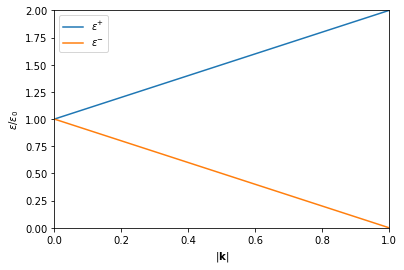

In [2]:
epsilon0 = 1
hbarvf = 1

def epsilon_plus(k):
    return epsilon0 + hbarvf * k

def epsilon_minus(k):
    return epsilon0 - hbarvf * k

fig, ax = plt.subplots()
kpoints = np.linspace(0, 1, 100)
ax.plot(kpoints, epsilon_plus(kpoints), label=r'$\epsilon^{+}$')
ax.plot(kpoints, epsilon_minus(kpoints), label=r'$\epsilon^{-}$')

ax.legend()
ax.set_xlabel(r'$\left | \mathbf{k} \right |$')
ax.set_ylabel(r'$\epsilon / \epsilon_{0}$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 2);

Plot density of states
------------------------

This is derived in the problem question, and given by
$$ g \left ( \epsilon \right ) = \frac{A}{2\pi\hbar^{2}v_{F}^{2}} \left | \epsilon - \epsilon_{0} \right |$$

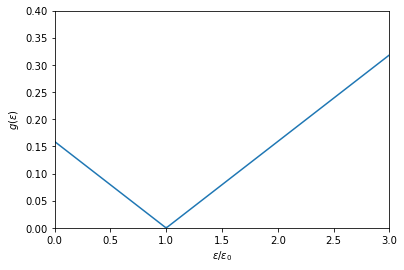

In [3]:
A = 1
def Edensityofstates(epsilon):
    return np.abs(epsilon - epsilon0) * A / (2 * np.pi * hbarvf**2)

fig, ax = plt.subplots()
Epoints = np.linspace(0, 3, 200)
ax.plot(Epoints, Edensityofstates(Epoints))

ax.set_xlabel(r'$\epsilon / \epsilon_{0}$')
ax.set_ylabel(r'$g \left ( \epsilon \right )$')
ax.set_xlim(0, 3)
ax.set_ylim(0, 0.4);

Plot occupation number
----------------------

The Fermi occupation number is given by $$n_{F} \left (\epsilon, T \right ) = \frac{1}{e^{\beta \left ( \epsilon - E_{F} \right )} + 1}$$
Higher temperatures are plotted more transparent

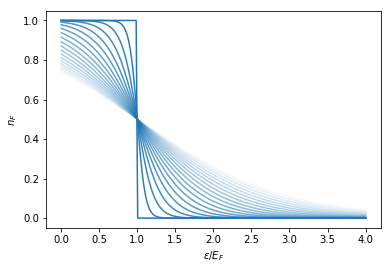

In [4]:
def nfermi(epsilon, T, Efermi):
    if T == 0:
        # Returns 1 if epsilon <= Efermi, 0 otherwise
        return (epsilon - Efermi) <= 0
    beta = 1 / T
    return 1 / (np.exp(beta * (epsilon - Efermi)) + 1 )

fig, ax = plt.subplots()
Epoints = np.linspace(0, 4, 200)
for T in np.linspace(0, 1, 20):
    ax.plot(Epoints, nfermi(Epoints, T, epsilon0), color='C0', alpha=1-T)

ax.set_xlabel(r'$\epsilon / E_{F}$')
ax.set_ylabel(r'$n_{F}$');

Calculate and plot internal energy
---------------------------

$$U \left ( T \right ) = 2 \int_{0}^{\infty} g \left (\epsilon \right ) n \left ( \epsilon, T \right ) \epsilon d \epsilon$$

Using the density of states and the occupancy function from above, we can calculate the total internal energy as a function of temperature. The factor of two arises because there are two electrons in each energy state.

The final graph shows that the interal energy acts as a power law for a range of temperatures, and the power law is given by

$$U \propto T^{3}$$

This means that the heat capacity will scale as
$$ C_{V} = \frac{\partial U}{\partial T} \propto T^{2}$$

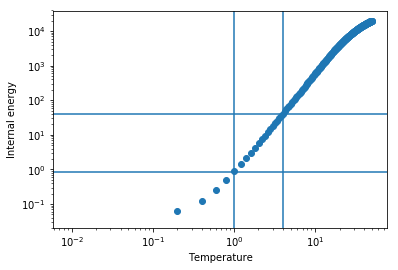

In [5]:
# Choose integral spacing
deps = 0.001
# Choose upper limit for integral
epsmax = 100

def U(T):
    epsilons = np.arange(0, epsmax, deps)
    density_of_states = Edensityofstates(epsilons)
    occupancy = nfermi(epsilons, T, epsilon0)
    # Do internal energy integral
    U = 2 * np.sum(density_of_states * occupancy * epsilons * deps)
    return U

fig, ax = plt.subplots()
for T in np.linspace(0, 50, 250):
    ax.scatter(T, U(T), color='C0')

ax.set_xlabel('Temperature')
ax.set_ylabel('Internal energy')
# We predict a power law, so do a loglog-plot
ax.set_xscale('log')
ax.set_yscale('log')

# Add lines to help work out what the power law is by eye
ax.axvline(1)
ax.axvline(4)
ax.axhline(U(1))
ax.axhline(U(4));